In [1]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import seaborn as sns

In [37]:
shots = pd.read_csv('.data/shots.csv')
shots.loc[:, 'freeze_frame'] = shots.loc[:, 'freeze_frame'].apply(ast.literal_eval)
shots.head()

,minute,player_name,team_name,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,open_goal,statsbomb_xg,type,technique,body_part,outcome,end_loc,freeze_frame
0,7,Lucy Quinn,Tottenham Hotspur Women,Regular Play,Right Wing,0,95.9,58.9,0,0,0,0.013642,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [116.7, 44.9, 1.2]}]","[{'freeze_frame': [{'location': [119.6, 42.3],..."
1,10,Rianna Dean,Tottenham Hotspur Women,From Free Kick,Center Forward,0,106.1,54.3,0,0,0,0.040844,Open Play,Normal,Right Foot,Off T,"[{'end_loc': [120.0, 41.6, 4.2]}]","[{'freeze_frame': [{'location': [118.8, 43.2],..."
2,11,Angela Addison,Tottenham Hotspur Women,From Free Kick,Left Wing,1,110.0,28.2,0,0,0,0.136871,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [117.6, 36.7, 0.4]}]","[{'freeze_frame': [{'location': [111.3, 39.8],..."
3,13,Kit Graham,Tottenham Hotspur Women,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,0,0.124624,Open Play,Normal,Head,Post,"[{'end_loc': [120.0, 37.9, 2.9]}]","[{'freeze_frame': [{'location': [105.8, 46.6],..."
4,16,Kit Graham,Tottenham Hotspur Women,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,0,0.023807,Open Play,Normal,Left Foot,Post,"[{'end_loc': [120.0, 37.3, 2.9]}]","[{'freeze_frame': [{'location': [97.8, 49.4], ..."


In [38]:
def ff_unpacking(players):
    players = players[0]['freeze_frame']
    for i in players:
        if i['position']['name'] == 'Goalkeeper' and i['teammate'] == False:
            gk_loc = i['location']
            return gk_loc

In [39]:
# only leave 'Open Play' shots (that are not directly from Free Kick, Corner, Penalty, Kick Off)
shots = shots.loc[shots.loc[:, 'type'] == 'Open Play', :].reset_index(drop = True)
shots.loc[:, 'gk_loc'] = shots.loc[:, 'freeze_frame'].apply(lambda x: ff_unpacking(x))

In [40]:
shots.loc[shots.loc[:, 'gk_loc'].isnull(), 'gk_loc']
# 42 None type situations

2189     None
3642     None
4533     None
5368     None
5370     None
5371     None
5372     None
5557     None
5558     None
5559     None
5638     None
5911     None
5936     None
5941     None
6053     None
6111     None
6397     None
6431     None
6433     None
6998     None
7199     None
7494     None
7511     None
7526     None
7531     None
7546     None
7810     None
7963     None
8063     None
8087     None
8126     None
8203     None
8345     None
8410     None
8454     None
8466     None
8476     None
8564     None
8651     None
8829     None
9209     None
10970    None
Name: gk_loc, dtype: object

In [83]:
#9209
none_gk = shots.loc[:, 'freeze_frame'][9209]
shots.iloc[9209, :]

minute                                                              33
player_name                                               Bethany Mead
team_name                                              England Women's
play_pattern_name                                         Regular Play
position_name                                               Right Wing
under_pressure                                                       1
x_start                                                          113.2
y_start                                                           41.1
follows_dribble                                                      0
first_time                                                           0
open_goal                                                            0
statsbomb_xg                                                  0.240804
type                                                         Open Play
technique                                                       Normal
body_p

In [84]:
ff_locs = pd.DataFrame()
for i in none_gk[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,False,25466,Vilde Bøe Risa,9,Right Defensive Midfield,110.7,34.9
1,False,25728,Karina Sævik,12,Right Midfield,95.9,34.1
2,True,31538,Mary Alexandra Earps,1,Goalkeeper,118.8,40.9
3,True,15555,Lauren Hemp,21,Left Wing,100.6,66.9
4,True,4641,Francesca Kirby,19,Center Attacking Midfield,109.6,34.0
5,True,4643,Georgia Stanway,9,Right Defensive Midfield,94.0,50.5
6,False,10514,Guro Reiten,16,Left Midfield,91.3,57.4
7,False,191851,Julie Blakstad,6,Left Back,101.1,60.5
8,False,24374,Ingrid Syrstad Engen,11,Left Defensive Midfield,102.9,55.3
9,False,10395,Maren Nævdal Mjelde,3,Right Center Back,112.1,56.8


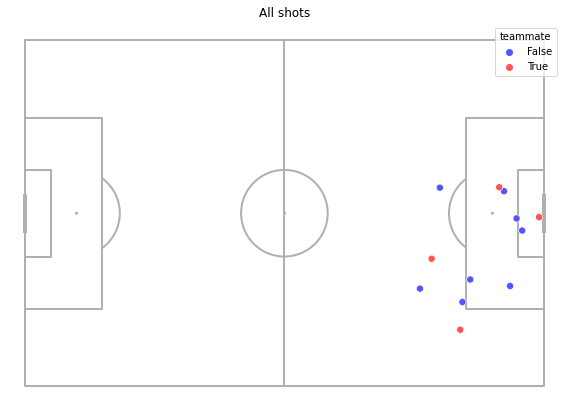

In [86]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = ff_locs, x = 'x', y = 'y', ax = ax, hue = 'teammate',
                palette = 'seismic', s = 50)

#ax.scatter(ff_locs.loc[6, 'x'], ff_locs.loc[6, 'y'], c = 'green', s = 50)

#ax.scatter(shots.loc[9209, 'x_start'], shots.loc[9209, 'y_start'], c = 'orange', s = 50)

#ax.scatter(shots.iloc[5941, :]['x_start'], shots.iloc[5941, :]['y_start'], c = 'orange', s = 50)

#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [89]:
# https://youtu.be/lVGiGZN2gdw?t=41 B.Mead England vs Norway header goal 

shots.loc[shots.loc[:, 'gk_loc'].isnull(), :].shape

(42, 19)

In [90]:
shots.shape

(11085, 19)

In [94]:
shots.loc[~shots.loc[:, 'gk_loc'].isnull(), :].shape

(11043, 19)

In [95]:
shots = shots.loc[~shots.loc[:, 'gk_loc'].isnull(), :].reset_index(drop = True)
shots.head()

,minute,player_name,team_name,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,open_goal,statsbomb_xg,type,technique,body_part,outcome,end_loc,freeze_frame,gk_loc
0,7,Lucy Quinn,Tottenham Hotspur Women,Regular Play,Right Wing,0,95.9,58.9,0,0,0,0.013642,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [116.7, 44.9, 1.2]}]","[{'freeze_frame': [{'location': [119.6, 42.3],...","[119.6, 42.3]"
1,10,Rianna Dean,Tottenham Hotspur Women,From Free Kick,Center Forward,0,106.1,54.3,0,0,0,0.040844,Open Play,Normal,Right Foot,Off T,"[{'end_loc': [120.0, 41.6, 4.2]}]","[{'freeze_frame': [{'location': [118.8, 43.2],...","[118.8, 43.2]"
2,11,Angela Addison,Tottenham Hotspur Women,From Free Kick,Left Wing,1,110.0,28.2,0,0,0,0.136871,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [117.6, 36.7, 0.4]}]","[{'freeze_frame': [{'location': [111.3, 39.8],...","[118.2, 36.8]"
3,13,Kit Graham,Tottenham Hotspur Women,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,0,0.124624,Open Play,Normal,Head,Post,"[{'end_loc': [120.0, 37.9, 2.9]}]","[{'freeze_frame': [{'location': [105.8, 46.6],...","[119.3, 39.0]"
4,16,Kit Graham,Tottenham Hotspur Women,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,0,0.023807,Open Play,Normal,Left Foot,Post,"[{'end_loc': [120.0, 37.3, 2.9]}]","[{'freeze_frame': [{'location': [97.8, 49.4], ...","[118.5, 40.0]"


In [97]:
shots.to_csv('.data/shots.csv', index = False)

**Distance between GK and shooter**

In [98]:
shots.head()

,minute,player_name,team_name,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,open_goal,statsbomb_xg,type,technique,body_part,outcome,end_loc,freeze_frame,gk_loc
0,7,Lucy Quinn,Tottenham Hotspur Women,Regular Play,Right Wing,0,95.9,58.9,0,0,0,0.013642,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [116.7, 44.9, 1.2]}]","[{'freeze_frame': [{'location': [119.6, 42.3],...","[119.6, 42.3]"
1,10,Rianna Dean,Tottenham Hotspur Women,From Free Kick,Center Forward,0,106.1,54.3,0,0,0,0.040844,Open Play,Normal,Right Foot,Off T,"[{'end_loc': [120.0, 41.6, 4.2]}]","[{'freeze_frame': [{'location': [118.8, 43.2],...","[118.8, 43.2]"
2,11,Angela Addison,Tottenham Hotspur Women,From Free Kick,Left Wing,1,110.0,28.2,0,0,0,0.136871,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [117.6, 36.7, 0.4]}]","[{'freeze_frame': [{'location': [111.3, 39.8],...","[118.2, 36.8]"
3,13,Kit Graham,Tottenham Hotspur Women,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,0,0.124624,Open Play,Normal,Head,Post,"[{'end_loc': [120.0, 37.9, 2.9]}]","[{'freeze_frame': [{'location': [105.8, 46.6],...","[119.3, 39.0]"
4,16,Kit Graham,Tottenham Hotspur Women,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,0,0.023807,Open Play,Normal,Left Foot,Post,"[{'end_loc': [120.0, 37.3, 2.9]}]","[{'freeze_frame': [{'location': [97.8, 49.4], ...","[118.5, 40.0]"


In [99]:
shots.loc[:, 'gk_loc_x'] = shots.loc[:, 'gk_loc'].apply(lambda x: x[0])
shots.loc[:, 'gk_loc_y'] = shots.loc[:, 'gk_loc'].apply(lambda x: x[1])

In [102]:
# Distance Feature calculation

# define goal center for 'statsbomb'
goal_center = np.array([120, 40])

# calculate distance between shot and goal center
shots['distance_to_gk'] = np.sqrt((shots.loc[:, 'x_start'] - shots.loc[:, 'gk_loc_x'])**2 + \
                                  (shots.loc[:, 'y_start'] - shots.loc[:, 'gk_loc_y'])**2)
shots['distance_to_gk'] = shots['distance_to_gk'].round(decimals = 2)

In [105]:
gk_dist = shots.loc[:, ['x_start', 'y_start', 'gk_loc_x', 'gk_loc_y', 'distance_to_gk']]
gk_dist.head()

,x_start,y_start,gk_loc_x,gk_loc_y,distance_to_gk
0,95.9,58.9,119.6,42.3,28.94
1,106.1,54.3,118.8,43.2,16.87
2,110.0,28.2,118.2,36.8,11.88
3,113.2,40.4,119.3,39.0,6.26
4,95.2,39.8,118.5,40.0,23.30


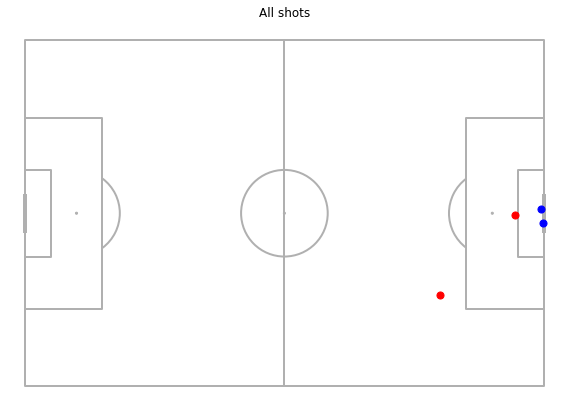

In [107]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))


ax.scatter(gk_dist.loc[3, 'x_start'], gk_dist.loc[3, 'y_start'], c = 'red', s = 50)

ax.scatter(gk_dist.loc[3, 'gk_loc_x'], gk_dist.loc[3, 'gk_loc_y'], c = 'blue', s = 50)

ax.scatter(gk_dist.loc[0, 'x_start'], gk_dist.loc[0, 'y_start'], c = 'red', s = 50)

ax.scatter(gk_dist.loc[0, 'gk_loc_x'], gk_dist.loc[0, 'gk_loc_y'], c = 'blue', s = 50)

#ax.scatter(shots.iloc[5941, :]['x_start'], shots.iloc[5941, :]['y_start'], c = 'orange', s = 50)

#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [108]:
shots.to_csv('.data/shots.csv', index = False)